### Amsterdam’s Airbnb Market in 2018
Data Exploration


In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

### Store CSV into DataFrame

In [2]:
#Data Frame for Calendar
calendar = pd.read_csv("./Data/Calendar.csv")
calendar.head()

,listing_id,date,available,price
0,2818,2019-12-05,f,NaN
1,73208,2019-08-30,f,NaN
2,73208,2019-08-29,f,NaN
3,73208,2019-08-28,f,NaN
4,73208,2019-08-27,f,NaN


In [3]:
calendar.count

<bound method DataFrame.count of          listing_id        date available    price
0              2818  2019-12-05         f      NaN
1             73208  2019-08-30         f      NaN
2             73208  2019-08-29         f      NaN
3             73208  2019-08-28         f      NaN
4             73208  2019-08-27         f      NaN
...             ...         ...       ...      ...
7310945    29979667  2018-12-11         t  $139.00
7310946    29979667  2018-12-10         t  $139.00
7310947    29979667  2018-12-09         t  $139.00
7310948    29979667  2018-12-08         t  $139.00
7310949    29979667  2018-12-07         t  $139.00

[7310950 rows x 4 columns]>

In [4]:
#Data Frame for Review Details
reviews_details = pd.read_csv ("./Data/reviews_details.csv")
reviews_details.head()

,listing_id,id,date,reviewer_id,reviewer_name
0,2818,1191,3/30/2009,10952,Lam
1,2818,1771,4/24/2009,12798,Alice
2,2818,1989,5/3/2009,11869,Natalja
3,2818,2797,5/18/2009,14064,Enrique
4,2818,3151,5/25/2009,17977,Sherwin


In [5]:
reviews_details.count

<bound method DataFrame.count of         listing_id         id       date  reviewer_id  reviewer_name
0             2818       1191  3/30/2009        10952            Lam
1             2818       1771  4/24/2009        12798          Alice
2             2818       1989   5/3/2009        11869        Natalja
3             2818       2797  5/18/2009        14064        Enrique
4             2818       3151  5/25/2009        17977        Sherwin
...            ...        ...        ...          ...            ...
431825    30435529  355474875  12/4/2018    131376847           Andy
431826    30439111  355041813  12/2/2018    103201416       Mohammed
431827    30518120  355519016  12/4/2018    228738702       Valeriya
431828    30525429  355658538  12/5/2018    111439550          Lucas
431829    30550093  355872191  12/6/2018    226911176  Mohamed Amine

[431830 rows x 5 columns]>

In [6]:
reviews_details.dropna(how='any')

,listing_id,id,date,reviewer_id,reviewer_name
0,2818,1191,3/30/2009,10952,Lam
1,2818,1771,4/24/2009,12798,Alice
2,2818,1989,5/3/2009,11869,Natalja
3,2818,2797,5/18/2009,14064,Enrique
4,2818,3151,5/25/2009,17977,Sherwin
...,...,...,...,...,...
431825,30435529,355474875,12/4/2018,131376847,Andy
431826,30439111,355041813,12/2/2018,103201416,Mohammed
431827,30518120,355519016,12/4/2018,228738702,Valeriya
431828,30525429,355658538,12/5/2018,111439550,Lucas


In [7]:
#Data Frame for Review Details
neighbourhoods = pd.read_csv ("./Data/neighbourhoods.csv")
neighbourhoods.head()

,neighbourhood_group,neighbourhood
0,NaN,Bijlmer-Centrum
1,NaN,Bijlmer-Oost
2,NaN,Bos en Lommer
3,NaN,Buitenveldert - Zuidas
4,NaN,Centrum-Oost


In [8]:
neighbourhoods.count()

neighbourhood_group     0
neighbourhood          22
dtype: int64

In [9]:
# Clean the data by dropping duplicates
neighbourhoods.dropna(how='any')

,neighbourhood_group,neighbourhood


In [11]:
#Data Frame for Review Details
listings_details = pd.read_csv ("./Data/listings_details.csv")
low_memory=False
listings_details.head()

C:\Users\memeg\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (87) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20181206172549,2018-12-06,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.10
1,3209,https://www.airbnb.com/rooms/3209,20181206172549,2018-12-06,"Quiet apt near center, great view",You will love our spacious (90 m2) bright apar...,"Our apartment has lots of light, a balcony and...",You will love our spacious (90 m2) bright apar...,none,Welcome to the Spaarndammerbuurt! From the beg...,...,f,NaN,{Amsterdam},f,f,moderate,f,f,1,1.03
2,20168,https://www.airbnb.com/rooms/20168,20181206172549,2018-12-06,100%Centre-Studio 1 Private Floor/Bathroom,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,2.18
3,25428,https://www.airbnb.com/rooms/25428,20181206172549,2018-12-06,Lovely apt in City Centre (Jordaan),NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,0.09
4,27886,https://www.airbnb.com/rooms/27886,20181206172549,2018-12-06,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.03


In [12]:
listings_details.count()

id                                  20030
listing_url                         20030
scrape_id                           20030
last_scraped                        20030
name                                19992
                                    ...  
cancellation_policy                 20030
require_guest_profile_picture       20030
require_guest_phone_verification    20030
calculated_host_listings_count      20030
reviews_per_month                   17624
Length: 96, dtype: int64

In [14]:
#Data Frame for Review Details
listings = pd.read_csv ("./Data/listings_details.csv")
low_memory=False
listings.head()

C:\Users\memeg\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (87) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20181206172549,2018-12-06,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.10
1,3209,https://www.airbnb.com/rooms/3209,20181206172549,2018-12-06,"Quiet apt near center, great view",You will love our spacious (90 m2) bright apar...,"Our apartment has lots of light, a balcony and...",You will love our spacious (90 m2) bright apar...,none,Welcome to the Spaarndammerbuurt! From the beg...,...,f,NaN,{Amsterdam},f,f,moderate,f,f,1,1.03
2,20168,https://www.airbnb.com/rooms/20168,20181206172549,2018-12-06,100%Centre-Studio 1 Private Floor/Bathroom,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,2.18
3,25428,https://www.airbnb.com/rooms/25428,20181206172549,2018-12-06,Lovely apt in City Centre (Jordaan),NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,0.09
4,27886,https://www.airbnb.com/rooms/27886,20181206172549,2018-12-06,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.03


In [15]:
listings.count()

id                                  20030
listing_url                         20030
scrape_id                           20030
last_scraped                        20030
name                                19992
                                    ...  
cancellation_policy                 20030
require_guest_profile_picture       20030
require_guest_phone_verification    20030
calculated_host_listings_count      20030
reviews_per_month                   17624
Length: 96, dtype: int64

                                             price
neighbourhood_cleansed                            
Centrum-West                            189.920034
Centrum-Oost                            189.376301
Zuid                                    171.126995
IJburg - Zeeburgereiland                165.157080
Oud-Noord                               157.684764
De Pijp - Rivierenbuurt                 157.178500
Buitenveldert - Zuidas                  153.087786
De Baarsjes - Oud-West                  143.849218
Oud-Oost                                143.398596
Westerpark                              141.004027
Watergraafsmeer                         137.514493
Oostelijk Havengebied - Indische Buurt  126.089677
Geuzenveld - Slotermeer                 125.735849
De Aker - Nieuw Sloten                  124.711268
Noord-West                              120.171875
Noord-Oost                              118.638132
Bos en Lommer                           116.996507
Slotervaart                    

FileNotFoundError: [Errno 2] No such file or directory: './Images/Av_priceNbh_Fig.01.png'

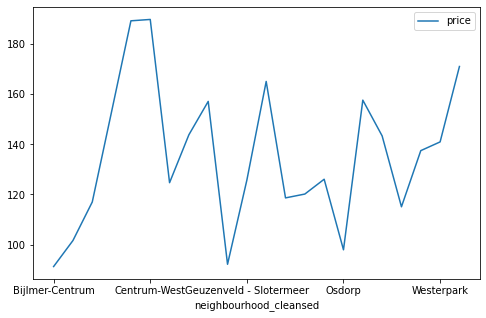

In [16]:
# In order to average price, we will be converting it to float and removing the $ sign
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)

print(listings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False))
listings.groupby(['neighbourhood_cleansed'])[['price']].mean().plot(figsize=(8,5));

#Print
plt.savefig("./Images/Av_priceNbh_Fig.01.png", bbox_inches = "tight")
plt.tight_layout()


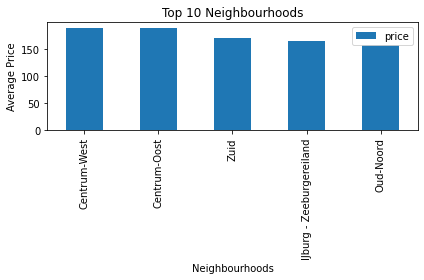

In [23]:
top10_neigh = listings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False).head()
top10_neigh.plot(kind='bar');

#Print
plt.savefig("./Images/top10_neigh_Fig.2.png", bbox_inches = "tight")
plt.title("Top 10 Neighbourhoods")
plt.ylabel("Average Price")
plt.xlabel("Neighbourhoods")
plt.tight_layout()


### Connect to local database

In [ ]:
rds_connection_string = "<insert user name>:<insert password>@localhost:5432/customer_db"
engine = create_engine(f'postgresql://{rds_connection_string}')

### Check for tables

In [ ]:
engine.table_names()